In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Part2 - Company.xlsx")
df.shape

(61, 5)

In [3]:
df.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [4]:
def explore (x):
    
    print("\033[1m HEAD\n\033[0m",x.head())
    print("\033[1m\nTAIL\n\033[0m",x.tail())
    print("\033[1m\nDATA TYPES\n\033[0m",x.dtypes)
    print("\033[1m\nDESCRIBE\n\033[0m",x.describe())
    print("\033[1m\nMissing value is:\033[0m",x.isnull().values.any())
    print("\033[1m\nDupicate value is:\033[0m",x.duplicated().values.any())
    print("\033[1m\nShape of Dataset:\033[0m",x.shape)
    print("\033[1m\nSize of Dataset:\033[0m",x.size)
    print("\033[1m\nUnique values: \n", df.nunique())

In [5]:
explore(df)

 HEAD
      A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

TAIL
       A    B    C    D    Quality
56  200  186  185  179  Quality B
57  137  182  165  199        NaN
58   88   39    9  102        NaN
59  180  157  192  198        NaN
60  157  135  135  156        NaN

DATA TYPES
 A           int64
B           int64
C           int64
D           int64
Quality    object
dtype: object

DESCRIBE
                 A           B           C           D
count   61.000000   61.000000   61.000000   61.000000
mean   118.557377  116.639344  114.081967  114.459016
std     61.771494   57.897908   65.615368   63.144431
min      3.000000    5.000000    3.000000    3.000000
25%     61.000000   63.000000   59.000000   51.000000
50%    136.000000  138.000000  135.000000  132.000000
75%    171.000000  168.000000  174.000000  174.000000
max    200.000000  200.0

From the above observations we can say that Quality have mising values.

In [6]:
df.Quality.isnull().values.sum()

18

There are 18 null values in Quality feature.

In [7]:
cleanup_nums = {"Quality": {"Quality A": 0, "Quality B": 1}}

In [8]:
df = df.replace(cleanup_nums)
df.head()

,A,B,C,D,Quality
0,47,27,45,108,0.0
1,174,133,134,166,1.0
2,159,163,135,131,NaN
3,61,23,3,44,0.0
4,59,60,9,68,0.0


In [9]:
df.dtypes

A            int64
B            int64
C            int64
D            int64
Quality    float64
dtype: object

In [10]:
df_KNN= df.loc[:,'A':'Quality']
df_KNN.head()

,A,B,C,D,Quality
0,47,27,45,108,0.0
1,174,133,134,166,1.0
2,159,163,135,131,NaN
3,61,23,3,44,0.0
4,59,60,9,68,0.0


In [11]:
df_KNN[df_KNN.isna().any(axis=1)]

,A,B,C,D,Quality
2,159,163,135,131,NaN
5,153,140,154,199,NaN
7,191,144,143,154,NaN
9,145,178,158,141,NaN
14,186,142,146,174,NaN
18,167,171,163,191,NaN
23,171,185,181,183,NaN
27,193,169,199,155,NaN
29,29,49,6,35,NaN
32,161,138,143,139,NaN


Imputing the mising values using KNN imputer

In [12]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
impute_KNN=imputer.fit_transform(df_KNN)
df_KNN_new = pd.DataFrame(impute_KNN, columns = ['A','B','C','D','Quality_KNN'])
df_KNN_new.head()

,A,B,C,D,Quality_KNN
0,47.0,27.0,45.0,108.0,0.0
1,174.0,133.0,134.0,166.0,1.0
2,159.0,163.0,135.0,131.0,1.0
3,61.0,23.0,3.0,44.0,0.0
4,59.0,60.0,9.0,68.0,0.0


In [13]:
df_KNN_Quality=pd.DataFrame(df_KNN_new['Quality_KNN'])
df_KNN_Quality.head()

,Quality_KNN
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


In [14]:
df_KNN_Quality

,Quality_KNN
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
56,1.0
57,1.0
58,0.0
59,1.0


In [15]:
df_KNN_Quality['Quality_KNN'] = df_KNN_Quality['Quality_KNN'].astype(float)

In [16]:
df_KNN_Quality.dtypes

Quality_KNN    float64
dtype: object

In [17]:
df_new = pd.concat([df_KNN.reset_index(drop=True),df_KNN_Quality.reset_index(drop=True)], axis=1)
df_new.head()

,A,B,C,D,Quality,Quality_KNN
0,47,27,45,108,0.0,0.0
1,174,133,134,166,1.0,1.0
2,159,163,135,131,NaN,1.0
3,61,23,3,44,0.0,0.0
4,59,60,9,68,0.0,0.0


In [33]:
df_new[df_new.isna().any(axis=1)]

,A,B,C,D,Quality,Quality_KNN
2,159,163,135,131,NaN,1.0
5,153,140,154,199,NaN,1.0
7,191,144,143,154,NaN,1.0
9,145,178,158,141,NaN,1.0
14,186,142,146,174,NaN,1.0
18,167,171,163,191,NaN,1.0
23,171,185,181,183,NaN,1.0
27,193,169,199,155,NaN,1.0
29,29,49,6,35,NaN,0.0
32,161,138,143,139,NaN,1.0


Drop quality column now

In [34]:
df_KNN_New=df_new.drop('Quality',axis=1)
df_KNN_New.head()

,A,B,C,D,Quality_KNN
0,47,27,45,108,0.0
1,174,133,134,166,1.0
2,159,163,135,131,1.0
3,61,23,3,44,0.0
4,59,60,9,68,0.0


In [35]:
df_KNN_New.isnull().any()

A              False
B              False
C              False
D              False
Quality_KNN    False
dtype: bool

# Imputing missing values through Kmeans

In [19]:
df_KMeans= df.loc[:,'A':'Quality']
df_KMeans.head()

,A,B,C,D,Quality
0,47,27,45,108,0.0
1,174,133,134,166,1.0
2,159,163,135,131,NaN
3,61,23,3,44,0.0
4,59,60,9,68,0.0


In [20]:
#df_KMeans_Null=pd.DataFrame(df_KNN[df_KNN.isna().any(axis=1)])
#df_KMeans_Null.head()

In [21]:
#df_KMeans=df_KMeans.dropna()
#df_KMeans[df_KMeans.isna().any(axis=1)]

In [22]:
df_KMeans_new=df_KMeans.drop('Quality',axis=1)
df_KMeans_new.head()

,A,B,C,D
0,47,27,45,108
1,174,133,134,166
2,159,163,135,131
3,61,23,3,44
4,59,60,9,68


In [23]:
from scipy.stats import zscore
Scaled=df_KMeans_new.apply(zscore)
Scaled.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


In [24]:
covMatrix = np.cov(Scaled,rowvar=False)
print(covMatrix)

[[1.01666667 0.78581209 0.84363634 0.81087956]
 [0.78581209 1.01666667 0.86962237 0.80511325]
 [0.84363634 0.86962237 1.01666667 0.83482015]
 [0.81087956 0.80511325 0.83482015 1.01666667]]


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

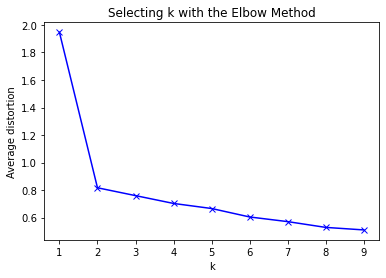

In [25]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Scaled)
    prediction=model.predict(Scaled)
    meanDistortions.append(sum(np.min(cdist(Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / Scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

We see an bend at 2 so we can have 2 clusters

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
  }
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Scaled)
    score = silhouette_score(Scaled, kmeans.labels_)
    silhouette_coefficients.append(score)
silhouette_coefficients

[0.6891674125195145,
 0.4999203416962172,
 0.4799030367066254,
 0.20784570366757432,
 0.22390504655168542,
 0.24572987370624777,
 0.23905992819748476,
 0.2318018675931348]

In [27]:
final_model=KMeans(2)
final_model.fit(Scaled)
prediction=final_model.predict(Scaled)

#Append the prediction 
df_KMeans["Quality_New"] = prediction
Scaled["Quality_New"] = prediction
print("Groups Assigned : \n")
df_KMeans.head()

Groups Assigned : 



,A,B,C,D,Quality,Quality_New
0,47,27,45,108,0.0,1
1,174,133,134,166,1.0,0
2,159,163,135,131,NaN,0
3,61,23,3,44,0.0,1
4,59,60,9,68,0.0,1


In [28]:
Clust = df_KMeans.groupby(['Quality_New'])
Clust.mean()

,A,B,C,D,Quality
Quality_New,,,,,
0,169.30303,163.909091,168.666667,166.606061,1.0
1,58.75000,60.928571,49.750000,53.000000,0.0


Group 0 has quality 1 and Group 1 has quality 0

In [29]:
df_KMeans[df_KMeans.isna().any(axis=1)]

,A,B,C,D,Quality,Quality_New
2,159,163,135,131,NaN,0
5,153,140,154,199,NaN,0
7,191,144,143,154,NaN,0
9,145,178,158,141,NaN,0
14,186,142,146,174,NaN,0
18,167,171,163,191,NaN,0
23,171,185,181,183,NaN,0
27,193,169,199,155,NaN,0
29,29,49,6,35,NaN,1
32,161,138,143,139,NaN,0


now we can drop Quality column

In [31]:
df_KMeans_new=df_KMeans.drop('Quality',axis=1)
df_KMeans_new.head()

,A,B,C,D,Quality_New
0,47,27,45,108,1
1,174,133,134,166,0
2,159,163,135,131,0
3,61,23,3,44,1
4,59,60,9,68,1


In [32]:
df_KMeans_new.isnull().any()

A              False
B              False
C              False
D              False
Quality_New    False
dtype: bool